In [186]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas

In [187]:
#read the files
since_1948_path = "unemploymet/csv_unemployment/per year since 1948.csv"
since_1948 = pd.read_csv (since_1948_path)
since_1948.head (2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0,NaN
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6,NaN


In [188]:
#make the average per year 
averages_1948=[]
since_1948 ["Annual"] = since_1948.iloc [:, 1:13].mean (axis=1)
since_1948 ["Annual"]= since_1948 ["Annual"].round (2)
since_1948

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0,3.75
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6,6.05
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3,5.21
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1,3.28
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.68
72,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,8.09
73,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,5.37
74,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,3.64


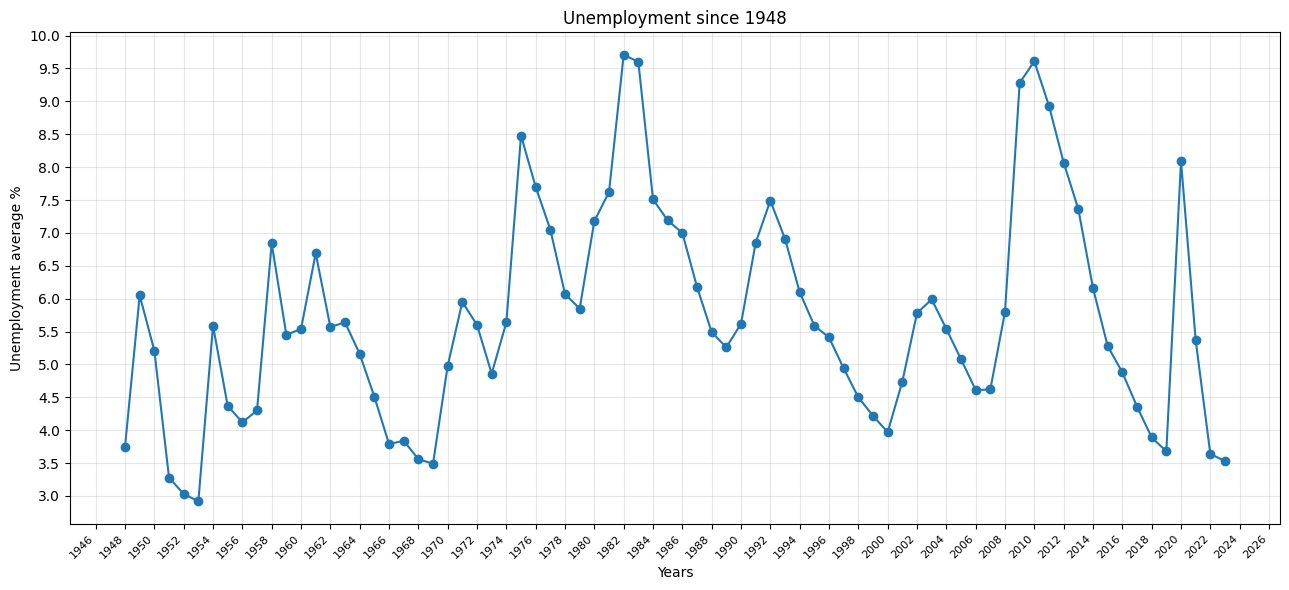

In [189]:
# make the plot
years =since_1948["Year"]
unem_mean = since_1948["Annual"]
plt.figure (figsize = (13,6))
plt.plot (years,unem_mean, marker = "o")
plt.title ("Unemployment since 1948")
plt.xlabel ("Years")
plt.ylabel ("Unemployment average %")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=2))  # Show labels every 5 years
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=.5))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.grid (True,alpha = .3)

In [190]:
#now lets make the plots by ethnicity the las ten years

asian_path = "unemploymet/csv_unemployment/asian_unem.csv"
white_path= "unemploymet/csv_unemployment/white_unem.csv"
black_or_Afri_path= "unemploymet/csv_unemployment/black_unem.csv"
hispanic_path= "unemploymet/csv_unemployment/hispanic_unem.csv"
asian=pd.read_csv (asian_path)
white =pd.read_csv (white_path)
black_or_Afri = pd.read_csv (black_or_Afri_path)
hispanic = pd.read_csv (hispanic_path)
black_or_Afri. head (11)


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,13.7,13.8,13.0,13.3,13.4,14.2,12.6,12.8,13.0,12.8,12.3,11.9
1,2014,12.1,11.8,12.1,11.6,11.4,11.0,11.6,11.4,11.0,10.6,10.9,10.6
2,2015,10.3,10.1,9.9,9.7,10.3,9.7,9.1,9.4,9.3,9.0,9.4,8.5
3,2016,8.5,8.6,8.9,8.8,8.2,8.7,8.2,8.0,8.5,8.5,8.2,8.0
4,2017,7.5,8.0,7.8,7.7,7.7,6.9,7.3,7.7,7.2,7.6,7.5,6.7
5,2018,7.5,6.8,6.7,6.4,5.9,6.4,6.5,6.3,6.1,6.5,6.1,6.6
6,2019,6.9,7.1,6.5,6.5,6.1,5.9,5.8,5.3,5.4,5.6,5.6,6.0
7,2020,6.3,6.0,6.8,16.6,16.8,15.4,14.4,12.8,12.1,10.9,10.4,10.0
8,2021,9.2,9.8,9.6,9.9,9.1,9.2,8.2,8.6,7.8,7.7,6.5,7.0
9,2022,6.9,6.6,6.2,5.9,6.2,5.9,6.0,6.4,5.9,5.9,5.7,5.7


In [191]:
#get the average per year.
asian ["Annual"] = asian.iloc [:, 1:13].mean (axis=1)
asian ["Annual"]= asian ["Annual"].round (2)
white ["Annual"] = white.iloc [:, 1:13].mean (axis=1)
white ["Annual"]= white ["Annual"].round (2)
black_or_Afri ["Annual"] = black_or_Afri.iloc [:, 1:13].mean (axis=1)
black_or_Afri ["Annual"]= black_or_Afri ["Annual"].round (2)
hispanic ["Annual"] = hispanic.iloc [:, 1:13].mean (axis=1)
hispanic ["Annual"]= hispanic ["Annual"].round (2)

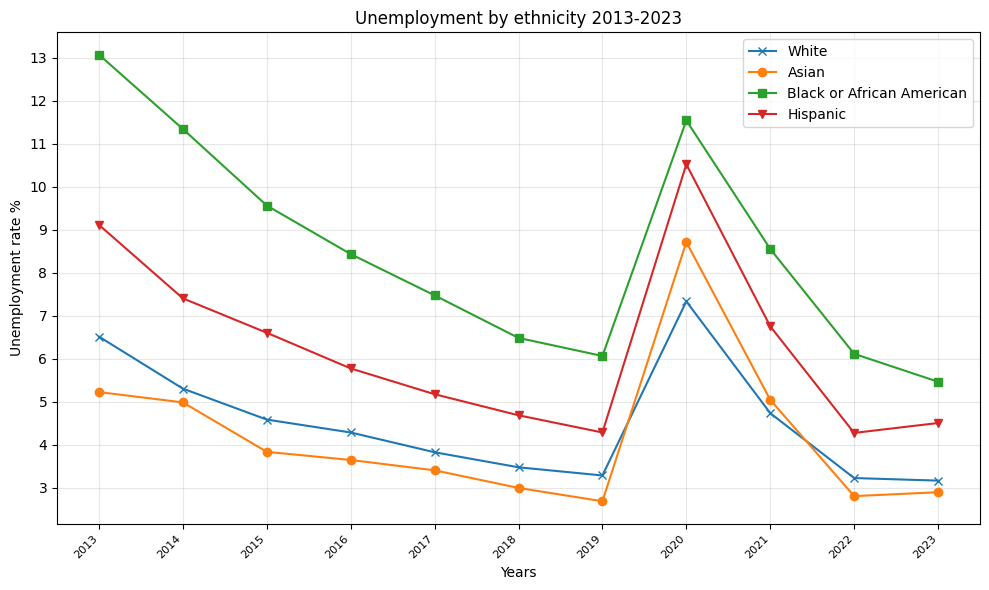

In [238]:
#selection of the column on the df to make plot by year and ethnicity
asian_10y = asian ["Annual"]
white_10y = white ["Annual"]
black_or_Afri_10y = black_or_Afri ["Annual"]
hispanic_10y= hispanic ["Annual"]
years= black_or_Afri ["Year"]
#black_or_Afri_10y

#plot by decade
plt.figure (figsize =(10,6))
plt.plot (years,white_10y,marker ="x" ,label="White")
plt.plot (years,asian_10y,marker ="o" ,label="Asian")
plt.plot (years,black_or_Afri_10y,marker ="s" ,label="Black or African American")
plt.plot (years,hispanic_10y,marker ="v" ,label="Hispanic")
plt.title ("Unemployment by ethnicity 2013-2023")
plt.xlabel ("Years")
plt.ylabel ("Unemployment rate %")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1)) 
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.legend ()
plt.grid (True,alpha = .3)


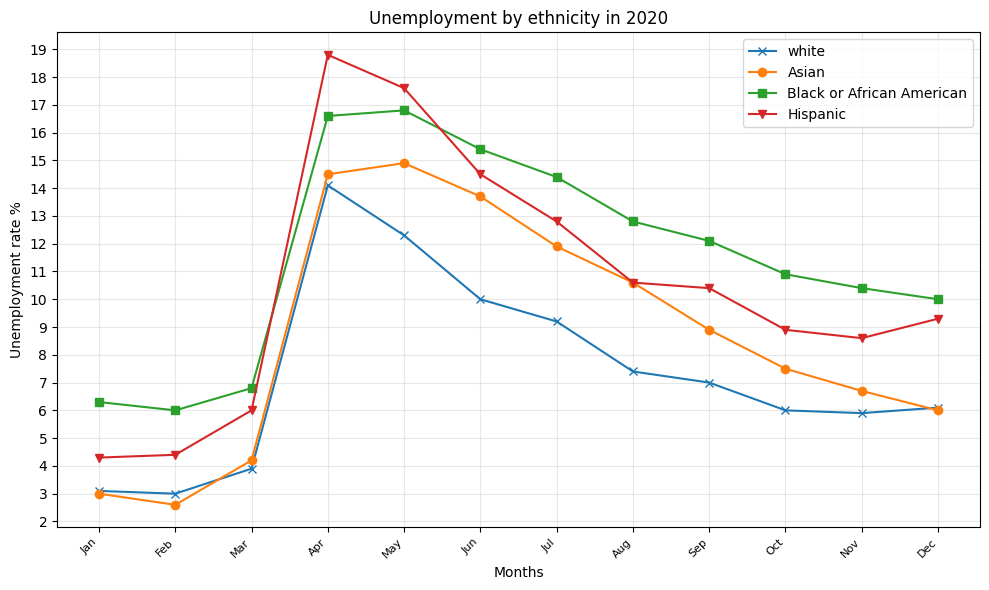

In [226]:
#selection of the row I want to plot only 2020
white_2020 = white.iloc [7,1:-1]
asian_2020 = asian.iloc [7,1:-1]
black_or_Afri_2020 =black_or_Afri.iloc [7,1:-1]
hispanic_2020= hispanic.iloc [7,1:-1]
months = white.columns[1:-1]
#hispanic_2020

#for plot only for 2020
plt.figure (figsize =(10,6))
plt.plot (months,white_2020,marker ="x" ,label="white")
plt.plot (months,asian_2020,marker ="o",label="Asian")
plt.plot (months,black_or_Afri_2020,marker ="s",label="Black or African American")
plt.plot (months,hispanic_2020,marker ="v",label="Hispanic")
plt.title ("Unemployment by ethnicity in 2020")
plt.xlabel ("Months")
plt.ylabel ("Unemployment rate %")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1)) 
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.legend ()
plt.grid (True,alpha = .3)


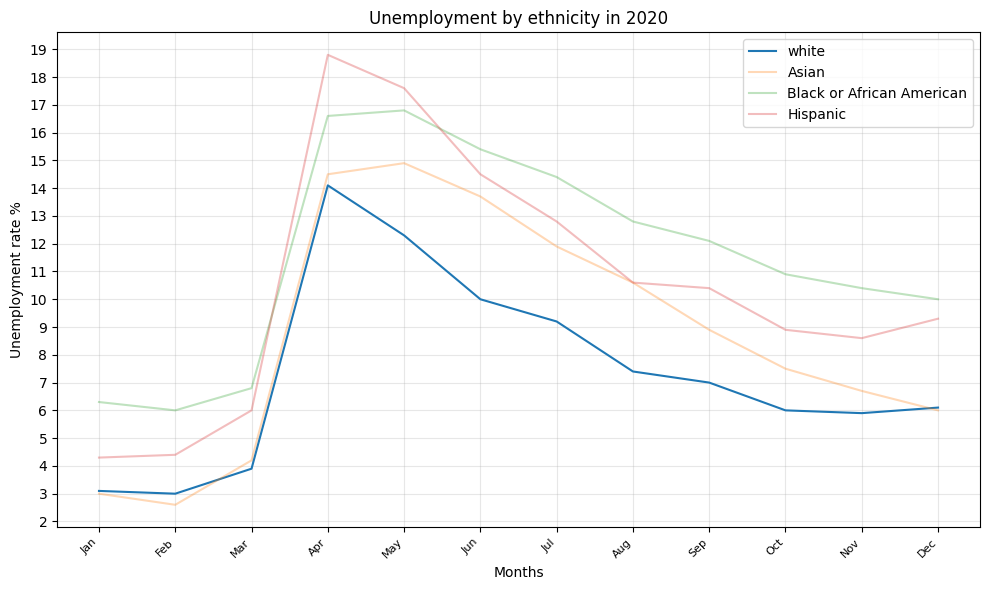

In [237]:
#selection of the row I want to plot only 2020
white_2020 = white.iloc [7,1:-1]
asian_2020 = asian.iloc [7,1:-1]
black_or_Afri_2020 =black_or_Afri.iloc [7,1:-1]
hispanic_2020= hispanic.iloc [7,1:-1]
months = white.columns[1:-1]
#hispanic_2020

#for plot only for 2020
plt.figure (figsize =(10,6))
plt.plot (months,white_2020,label="white")
plt.plot (months,asian_2020,label="Asian",alpha=.3)
plt.plot (months,black_or_Afri_2020,label="Black or African American",alpha=.3)
plt.plot (months,hispanic_2020,label="Hispanic",alpha=.3)
plt.title ("Unemployment by ethnicity in 2020")
plt.xlabel ("Months")
plt.ylabel ("Unemployment rate %")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1)) 
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.legend ()
plt.grid (True,alpha = .3)

In [280]:
#for earning by education level
bachelor_path="earnings/csv_earnings/salary workers_Bachelor's_degree_or_higher.csv"
advanced_degree_path = "earnings/csv_earnings/salary_workers_ Advanced_degree.csv"
highshool_path= "earnings/csv_earnings/salary_workers_High_school_graduates_no_college,.csv"
Less_highschool_path = "earnings/csv_earnings/salary_workers_Lesshigh_school_ diploma_ 25_years_and_over.csv"
some_college_associate_path= "earnings/csv_earnings/salary_workers_Some_college_or_associate_degree.csv"

bachelor_degree = pd.read_csv (bachelor_path)
bachelor_degree.rename (columns={"Annual":"Annual_BD"},inplace=True)
advanced_degree = pd.read_csv (advanced_degree_path)
advanced_degree.rename (columns={"Annual":"Annual_AD"},inplace=True)
high_school = pd.read_csv(highshool_path)
high_school.rename (columns={"Annual":"Annual_HS"},inplace=True)
less_high_school = pd.read_csv (Less_highschool_path)
less_high_school.rename (columns={"Annual":"Annual_LHS"},inplace=True)
some_college_associate = pd.read_csv (some_college_associate_path)
some_college_associate.rename (columns={"Annual":"Annual_SC_A"},inplace=True)
all_levels = pd.concat ([bachelor_degree,advanced_degree,some_college_associate,high_school,less_high_school], axis=1)
print (all_levels.head())

   Year  Qtr1  Qtr2    Qtr3    Qtr4  Annual_BD  Year  Qtr1  Qtr2    Qtr3  ...  \
0  2007  1030  1092  1088.0  1086.0     1072.0  2007  1206  1220  1254.0  ...   
1  2008  1108  1105  1131.0  1115.0     1115.0  2008  1259  1298  1333.0  ...   
2  2009  1138  1140  1145.0  1121.0     1137.0  2009  1326  1332  1336.0  ...   
3  2010  1140  1138  1158.0  1139.0     1144.0  2010  1361  1341  1368.0  ...   
4  2011  1150  1141  1152.0  1158.0     1150.0  2011  1336  1344  1354.0  ...   

   Qtr2   Qtr3   Qtr4  Annual_HS  Year  Qtr1  Qtr2   Qtr3   Qtr4  Annual_LHS  
0   597  610.0  610.0      604.0  2007   429   440  422.0  424.0       428.0  
1   620  618.0  619.0      618.0  2008   435   449  471.0  459.0       453.0  
2   630  621.0  638.0      626.0  2009   450   465  448.0  449.0       454.0  
3   629  622.0  633.0      626.0  2010   448   440  449.0  438.0       444.0  
4   643  636.0  641.0      638.0  2011   444   458  459.0  444.0       451.0  

[5 rows x 30 columns]


In [283]:
#selection of rows for plot
earnings_bachelor =all_levels["Annual_BD"]
earnings_advanced= all_levels ["Annual_AD"]
earnings_high_shool= all_levels["Annual_HS"]
earnings_less_HS= all_levels ["Annual_LHS"]
earnings_college_asso= all_levels ["Annual_SC_A"]
time= all_levels.iloc [:,0]

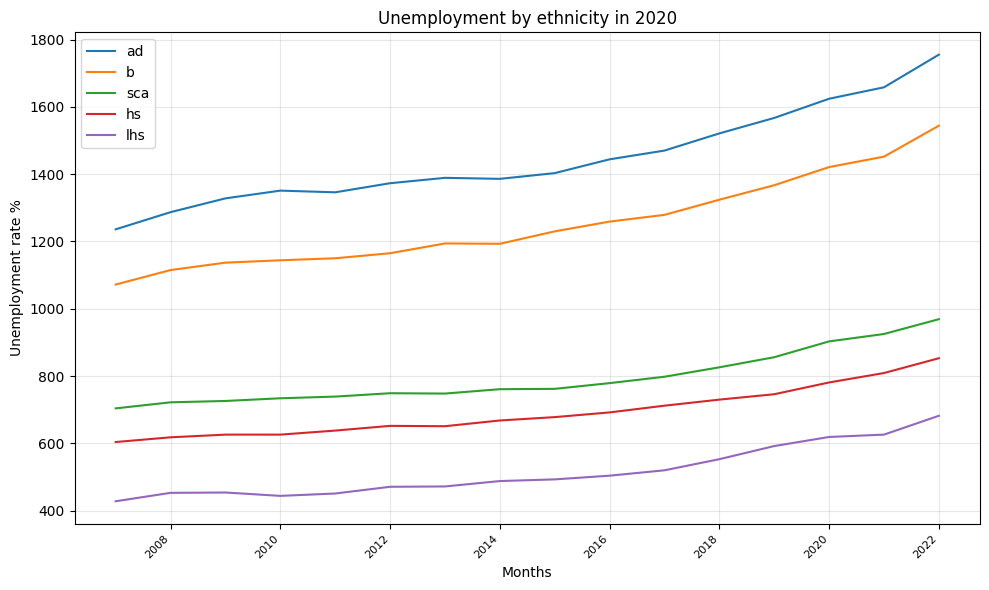

In [286]:
plt.figure (figsize =(10,6))
plt.plot (time,earnings_advanced,label="ad")
plt.plot (time,earnings_bachelor,label="b")
plt.plot (time,earnings_college_asso,label="sca")
plt.plot (time,earnings_high_shool,label="hs")
plt.plot (time,earnings_less_HS,label="lhs")
plt.title ("Unemployment by ethnicity in 2020")
plt.xlabel ("Months")
plt.ylabel ("Unemployment rate %")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.legend ()
plt.grid (True,alpha = .3)
plt.show()

let's see what else.

In [204]:
#let's see if I can do something with this.
marr_and_div_path = "national-marriage-divorce-rates-00-21.csv"
marriage_divorces =pd.read_csv (marr_and_div_path)
marriage_divorces.head(2)

,Year,Marriages,Population,"Rate per 1,000 total population",Divorces & annulments,Population.1,"Rate per 1,000 total population.1",Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2021,1985072,331893745,6.0,689308,276585104,2.5,NaN,NaN,NaN
1,2020,1676911,329484123,5.1,630505,274190425,2.3,NaN,NaN,NaN


In [207]:
#select the rows and columns for plot

marriage_10y = marriage_divorces.iloc [0:9,3]
divorce_10Y=marriage_divorces.iloc [0:9,6]
years= marriage_divorces.iloc [0:9,0]
divorce_10Y.head(2)

0    2.5
1    2.3
Name: Rate per 1,000 total population.1, dtype: float64

In [208]:
years.head(2)

0    2021
1    2020
Name: Year, dtype: int64

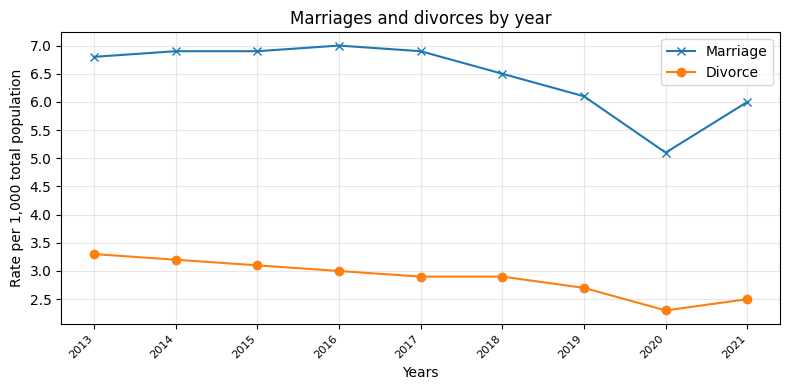

In [222]:
#plot for
plt.figure (figsize =(8,4))
plt.plot (years,marriage_10y,marker ="x" ,label="Marriage")
plt.plot (years,divorce_10Y,marker ="o",label="Divorce")
plt.title ("Marriages and divorces by year")
plt.xlabel ("Years")
plt.ylabel ("Rate per 1,000 total population")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1)) 
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=.5))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.legend ()
plt.grid (True,alpha = .3)

In this part i didn't know what else I could do, so I tried to correlate mariage rates with unemployment, nothing special hapened.

In [211]:
# to see if in the las 20 years marriage cahnge with unemplyment rate
unemployment_20y= since_1948.iloc [52:-2,:]
unemployment_20y.head (2)
unemployment_20y_annu = unemployment_20y.iloc [:,13]
unemployment_20y_annu.head (2)

52    3.97
53    4.74
Name: Annual, dtype: float64

In [212]:
marriage_20y = marriage_divorces.iloc [:,3]
divorce_20y = marriage_divorces.iloc [:,6]

In [213]:
correlation = st.pearsonr (unemployment_20y_annu,marriage_20y)
print (f"The correlation between both factors is {round(correlation[0],1)}")

The correlation between both factors is -0.1


The correlation between both factors is 0.2


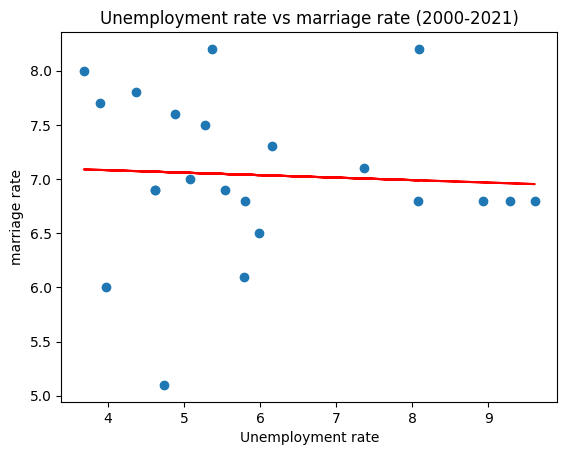

In [241]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(unemployment_20y_annu,marriage_20y)
regres_values = unemployment_20y_annu * slope + intercept
line_eq = 'y=' +str (round(slope,2)) + 'x +' + str (round(intercept,2))

plt.scatter (unemployment_20y_annu,marriage_20y)
plt.plot (unemployment_20y_annu,regres_values, "r-")
plt.title ("Unemployment rate vs marriage rate (2000-2021)")
plt.xlabel ("Unemployment rate")
plt.ylabel ("marriage rate")
print (f"The correlation between both factors is {round(correlation[0],1)}")

In [215]:
#relationship between divorce and Unemployment
correlation = st.pearsonr (unemployment_20y_annu,divorce_20y)

The correlation between both factors is 0.2


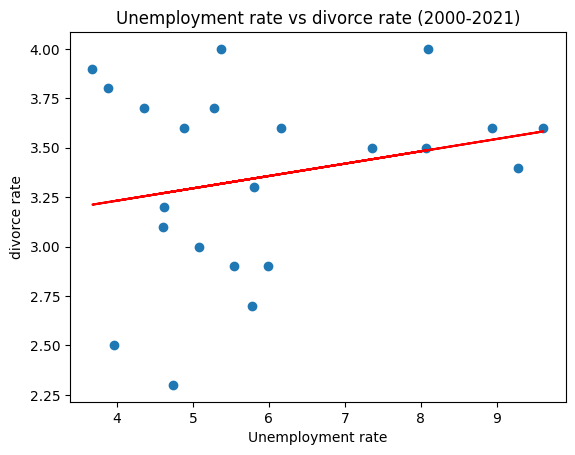

In [242]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(unemployment_20y_annu,divorce_20y)
regres_values = unemployment_20y_annu * slope + intercept
line_eq = 'y=' +str (round(slope,2)) + 'x +' + str (round(intercept,2))

plt.scatter (unemployment_20y_annu,divorce_20y)
plt.plot (unemployment_20y_annu,regres_values, "r-")
plt.title ("Unemployment rate vs divorce rate (2000-2021)")
plt.xlabel ("Unemployment rate")
plt.ylabel ("divorce rate")
print (f"The correlation between both factors is {round(correlation[0],1)}")